## Instalando os pacotes

In [191]:
!pip install pandas
!pip install matplotlib
!pip install tabulate
!pip install folium
from IPython.display import display, HTML
!pip install contextily geopandas


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   --------- ------------------------------ 6.0/25.4 MB 30.2 MB/s eta 0:00:01
   -------------------- ------------------- 12.8/25.4 MB 31.6 MB/s eta 0:00:01
   ------------------------------- -------- 19.9/25.4 MB 32.9 MB/s eta 0:00:01
   -------------------------------- ------- 20.7/25.4 MB 25.7 MB/s eta 0:00:01
   ---------------------------------------- 25.4/25.4 MB 25.3 MB/s  0:00:01

   ----------------------------------------  0/10 [joblib]
   ----------------------------------------  0/10 [joblib]
   ----------------------------------------  0/10 [joblib]
   ----------------------------------------  0/10 [joblib]
   ----------------------------------------  0/10 [joblib]
   ----------------------------------------  0/10 [joblib]
   ---- -----------------------------------  1/10 [geographiclib]
   ---- -----------------------------------  1/10 [geographiclib]
   -------- -------------------------------  2/10 [c


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [162]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import folium.plugins

## Agregando os dados

In [163]:
   # Caminho da pasta onde estão os arquivos
pasta = r"D:\Documentos\Doutorado\Python\python_env_app\dados\Dados_Sul"

# Lendo os arquivos csv
arquivos = glob.glob(os.path.join(pasta, "*.csv"))

# Exibindo os arquivos encontrados
print(arquivos)

['D:\\Documentos\\Doutorado\\Python\\python_env_app\\dados\\Dados_Sul\\dados_CWB_D_2020-01-01_2024-12-31.csv', 'D:\\Documentos\\Doutorado\\Python\\python_env_app\\dados\\Dados_Sul\\dados_ITJ_D_2020-01-01_2024-12-31.csv', 'D:\\Documentos\\Doutorado\\Python\\python_env_app\\dados\\Dados_Sul\\dados_POA_D_2020-01-01_2024-12-31.csv']


In [164]:
#Caminho onde os dados estão armazenados
data_path = r"D:\Documentos\Doutorado\Python\python_env_app\dados\Dados_Sul"


In [165]:
# Glob para encontrar os arquivos
planilhas = os.path.join(data_path, "dados_*.csv")
arquivos_csv = glob.glob(planilhas)

In [166]:
# Lista para armazenar os DataFrames processados
lista_dfs = []

## Agregando os dados e criando colunas com os metadados

In [167]:
for arquivo in arquivos_csv:
    try:
        # Extrair o nome da estação 
        base_name = os.path.basename(arquivo)
        station_id = base_name.split('_')[1] 
        
        # Ler os metadados
        
        with open(arquivo, 'r') as f:
            lines = [f.readline() for _ in range(4)] # Lê as 4 primeiras linhas (index 0 a 3)

        
        
        latitude = float(lines[1].split(':')[1].split(',')[0].strip())
        longitude = float(lines[2].split(':')[1].split(',')[0].strip())
        altitude = float(lines[3].split(':')[1].split(',')[0].strip())
        
        
        
        df = pd.read_csv(arquivo, skiprows=5, sep=',', header=0)
        
        # Adicionando nova coluna com os metadados
        df['NOME'] = station_id
        df['LATITUDE'] = latitude
        df['LONGITUDE'] = longitude
        df['ALTITUDE'] = altitude
        
        # Conversão da coluna DATETIME
        df['DATETIME'] = pd.to_datetime(df['DATETIME'], format='mixed', errors='coerce')
        
        # Colunas
        required_cols = ['NOME', 'DATETIME', 'TEMPERATURA_MEDIA', 'LATITUDE', 'LONGITUDE', 'ALTITUDE']
        existing_cols = df.columns.tolist()
        final_cols = required_cols + [col for col in existing_cols if col not in required_cols]
        df = df[final_cols]
        
        # Adiciona o DataFrame processado à lista
        lista_dfs.append(df)
        print(f"Arquivo {base_name} processado com sucesso.")
        
    except Exception as e:
        print(f"Erro ao processar o arquivo {arquivo}: {e}")
        continue

Arquivo dados_CWB_D_2020-01-01_2024-12-31.csv processado com sucesso.
Arquivo dados_ITJ_D_2020-01-01_2024-12-31.csv processado com sucesso.
Arquivo dados_POA_D_2020-01-01_2024-12-31.csv processado com sucesso.


## Concatenação dos dataframes

In [168]:
# Concatenar os dataframes
if lista_dfs:
    df_combinado = pd.concat(lista_dfs, ignore_index=True)
    print("\nAgregação concluída.")
    
    # Exibe as primeiras linhas do DataFrame final
    print("\n--- DataFrame Final (Primeiras 5 linhas) ---")
    print(df_combinado.head())
    
    # Salva o DataFrame final em um novo CSV para inspeção
    output_path = "dados_meteorologicos_agregados.csv"
    df_combinado.to_csv(output_path, index=False)
    print(f"\nDataFrame final salvo em: {output_path}")
else:
    print("\nNenhum dado foi processado.")


Agregação concluída.

--- DataFrame Final (Primeiras 5 linhas) ---
  NOME   DATETIME  TEMPERATURA_MEDIA   LATITUDE  LONGITUDE  ALTITUDE
0  CWB 2020-01-01               24.7 -25.448611 -49.230556    922.91
1  CWB 2020-01-02               21.4 -25.448611 -49.230556    922.91
2  CWB 2020-01-03               19.1 -25.448611 -49.230556    922.91
3  CWB 2020-01-04               18.3 -25.448611 -49.230556    922.91
4  CWB 2020-01-05               19.7 -25.448611 -49.230556    922.91

DataFrame final salvo em: dados_meteorologicos_agregados.csv


In [169]:
 # Temperatura Média, Máxima e Mínima por cidade
print("\n--- Análise de Temperatura por Cidade (Período Completo) ---")

analysis_df = df_combinado.groupby('NOME')['TEMPERATURA_MEDIA'].agg(
        Media='mean',
        Maxima='max',
        Minima='min').reset_index()
    
#Temperatura com duas casas decimais
analysis_df['Media'] = analysis_df['Media'].round(2)
analysis_df['Maxima'] = analysis_df['Maxima'].round(2)
analysis_df['Minima'] = analysis_df['Minima'].round(2)

print(analysis_df.to_markdown)



--- Análise de Temperatura por Cidade (Período Completo) ---
<bound method DataFrame.to_markdown of   NOME  Media  Maxima  Minima
0  CWB  18.66    27.8     7.8
1  ITJ  20.37    28.1     9.2
2  POA  20.04    31.0     6.7>


## Tabela de Análise

In [181]:
print("\n--- Análise de Temperatura por Cidade (Período Completo) ---")
analysis_df = df_combinado.groupby('NOME').agg(
        Media=('TEMPERATURA_MEDIA', 'mean'),
        Maxima=('TEMPERATURA_MEDIA', 'max'),
        Minima=('TEMPERATURA_MEDIA', 'min'),
        LATITUDE=('LATITUDE', 'first'),
        LONGITUDE=('LONGITUDE', 'first'),
        ALTITUDE=('ALTITUDE', 'first')
    ).reset_index()
    
    # 2 casas decimais
analysis_df['Media'] = analysis_df['Media'].round(2)
analysis_df['Maxima'] = analysis_df['Maxima'].round(2)
analysis_df['Minima'] = analysis_df['Minima'].round(2)
    
   
print("\n--- Tabela de Análise (Markdown) ---")
print(analysis_df.to_markdown(index=False, floatfmt=".2f"))

# Tabela Estilizada
html_table = analysis_df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('color', 'black'), ('font-family', 'sans-serif'), ('font-size', '14px'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('font-family', 'sans-serif'), ('font-size', '14px'), ('text-align', 'center')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]}
]).set_properties(**{'border': '1px solid #ddd', 'padding': '8px'}).hide(axis='index').to_html()

display(HTML(html_table))



--- Análise de Temperatura por Cidade (Período Completo) ---

--- Tabela de Análise (Markdown) ---
| NOME   |   Media |   Maxima |   Minima |   LATITUDE |   LONGITUDE |   ALTITUDE |
|:-------|--------:|---------:|---------:|-----------:|------------:|-----------:|
| CWB    |   18.66 |    27.80 |     7.80 |     -25.45 |      -49.23 |     922.91 |
| ITJ    |   20.37 |    28.10 |     9.20 |     -26.95 |      -48.76 |       9.76 |
| POA    |   20.04 |    31.00 |     6.70 |     -30.05 |      -51.17 |      41.18 |


NOME,Media,Maxima,Minima,LATITUDE,LONGITUDE,ALTITUDE
CWB,18.660000,27.800000,7.800000,-25.448611,-49.230556,922.910000
ITJ,20.370000,28.100000,9.200000,-26.950833,-48.761944,9.760000
POA,20.040000,31.000000,6.700000,-30.053611,-51.174722,41.180000


## Gráfico de Barras

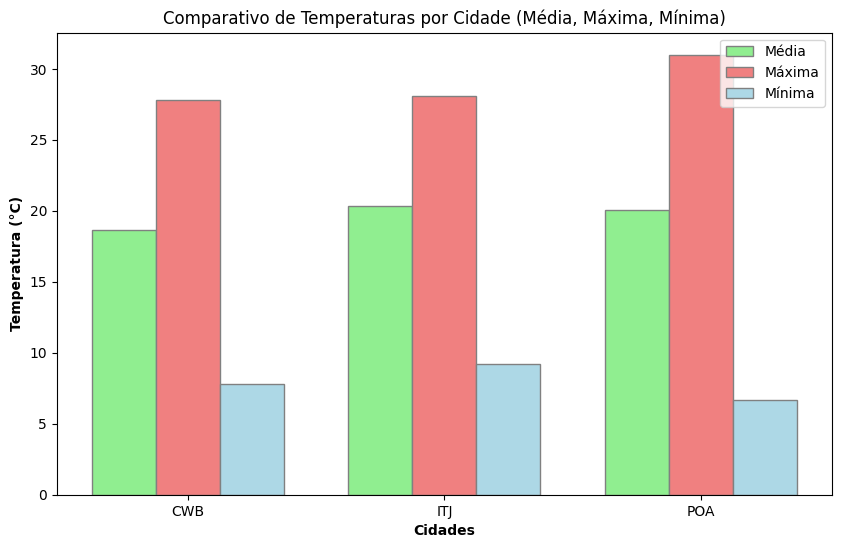

In [184]:
bar_width = 0.25

r1 = range(len(analysis_df['NOME']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, analysis_df['Media'], color='lightgreen', width=bar_width, edgecolor='grey', label='Média')
plt.bar(r2, analysis_df['Maxima'], color='lightcoral', width=bar_width, edgecolor='grey', label='Máxima')
plt.bar(r3, analysis_df['Minima'], color='lightblue', width=bar_width, edgecolor='grey', label='Mínima')
plt.xlabel('Cidades', fontweight='bold')
plt.ylabel('Temperatura (°C)', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(analysis_df['NOME']))], analysis_df['NOME'])
plt.title('Comparativo de Temperaturas por Cidade (Média, Máxima, Mínima)')
plt.legend()
plt.show()

graph_path = "temperaturas_por_cidade.png"

## Mapas

In [172]:
# Bloco de criação do analysis_df (Linhas 89-96):
analysis_df = df_combinado.groupby('NOME').agg(
    Media=('TEMPERATURA_MEDIA', 'mean'),
    Maxima=('TEMPERATURA_MEDIA', 'max'),
    Minima=('TEMPERATURA_MEDIA', 'min'),
    LATITUDE=('LATITUDE', 'first'),  # <--- Esta linha garante a coluna LATITUDE
    LONGITUDE=('LONGITUDE', 'first'),
    ALTITUDE=('ALTITUDE', 'first')
).reset_index()

map_center = [analysis_df['LATITUDE'].mean(), analysis_df['LONGITUDE'].mean()] # <--- Esta linha usa a coluna

## Mapa de Coordenadas - Localização

In [173]:
 # Cria o mapa centrado na média das coordenadas
map_center = [analysis_df['LATITUDE'].mean(), analysis_df['LONGITUDE'].mean()]
m = folium.Map(location=map_center, zoom_start=6)
    
    # Adiciona marcadores para cada estação
for index, row in analysis_df.iterrows():
    folium.Marker(
        [row['LATITUDE'], row['LONGITUDE']],
        popup=f"Estação: {row['NOME']}<br>Altitude: {row['ALTITUDE']}m<br>Temp. Média: {row['Media']}°C"
        ).add_to(m)
        
    # Salva o mapa em HTML
map_path = "mapa_estacoes_meteorologicas.html"
m.save(map_path)
print(f"\nMapa interativo gerado e salvo em: {map_path}")
display(m)



Mapa interativo gerado e salvo em: mapa_estacoes_meteorologicas.html


## Mapa de Calor

In [185]:
 # Cria um novo mapa centrado na mesma região
m_heatmap = folium.Map(location=map_center, zoom_start=6)
    
# Preparação dos dados para o HeatMap: [latitude, longitude, temperatura_maxima]
heat_data = analysis_df[['LATITUDE', 'LONGITUDE', 'Maxima']].values.tolist()
    
# Camada HeatMap
folium.plugins.HeatMap(heat_data, radius=15).add_to(m_heatmap)
    
# Mapa em HTML
heatmap_path = "mapa_calor_maximas.html"
m_heatmap.save(heatmap_path)
print(f"\nMapa de Calor gerado e salvo em: {heatmap_path}")
    
display(m_heatmap)



Mapa de Calor gerado e salvo em: mapa_calor_maximas.html


In [175]:
 # Cria um novo mapa centrado na mesma região Sul do Brasil
m_heatmap = folium.Map(location=map_center, zoom_start=6)
    
    # Prepara os dados para o HeatMap: [latitude, longitude, temperatura_maxima]
heat_data = analysis_df[['LATITUDE', 'LONGITUDE', 'Maxima']].values.tolist()
    
    # Adiciona a camada de HeatMap
folium.plugins.HeatMap(heat_data, radius=15).add_to(m_heatmap)
    
    # Salva o mapa de calor em HTML
heatmap_path = "mapa_calor_maximas.html"
m_heatmap.save(heatmap_path)
print(f"\nMapa de Calor gerado e salvo em: {heatmap_path}")
    
    # Exibe o mapa de calor no Jupyter Notebook
display(m_heatmap)


Mapa de Calor gerado e salvo em: mapa_calor_maximas.html


## Mapa de Menor Temperatura

In [188]:
    # Ordena o DataFrame pela temperatura mínima
sorted_analysis_df = analysis_df.sort_values(by='Minima', ascending=True).reset_index(drop=True)
    
    #Atribui as cores: Azul (menor), Verde (meio), Vermelho (maior)
colors = ['blue', 'green', 'red']
color_map = {row['NOME']: colors[i] for i, row in sorted_analysis_df.iterrows()}
    
for index, row in analysis_df.iterrows():
    station_color = color_map.get(row['NOME'], 'gray') # Usando cinza como fallback
        
    folium.Marker(
        [row['LATITUDE'], row['LONGITUDE']],
        popup=f"Estação: {row['NOME']}<br>Altitude: {row['ALTITUDE']}m<br>Temp. Média: {row['Media']}°C<br>Temp. Mínima: {row['Minima']}°C",
        icon=folium.Icon(color=station_color, icon='cloud', prefix='fa')
        ).add_to(m)
        
    # Mapa em HTML
map_path = "mapa_estacoes_meteorologicas.html"
m.save(map_path)
print(f"\nMapa interativo gerado e salvo em: {map_path}")

display(m)


Mapa interativo gerado e salvo em: mapa_estacoes_meteorologicas.html


In [190]:
# 9. Gera o mapa estático (PNG) com as estações e limites da Região Sul
    
plt.figure(figsize=(8, 10))
    
    # Plota as estações (Longitude no eixo X, Latitude no eixo Y)
plt.scatter(analysis_df['LONGITUDE'], analysis_df['LATITUDE'], 
    s=100, c='red', alpha=0.8, edgecolors='black', label='Estações')
    
    # Adiciona o nome das estações ao lado dos pontos
for i, row in analysis_df.iterrows():
    plt.annotate(row['NOME'], (row['LONGITUDE'] + 0.1, row['LATITUDE']), fontsize=10)
        
    # Limita os eixos para a Região Sul do Brasil
    # Limites aproximados:
    # Latitude: -34 (Sul) a -22 (Norte)
    # Longitude: -57 (Oeste) a -47 (Leste)
plt.xlim(-57, -47)
plt.ylim(-34, -22)
    
    # Adiciona rótulos e título
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapa Estático das Estações na Região Sul')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
    
    # Salva o mapa estático
static_map_path = "mapa_estatico_regiao_sul.png"
plt.savefig(static_map_path)
plt.close()
print(f"\nMapa estático gerado e salvo em: {static_map_path}")

    # 7. Gera o mapa interativo com os pontos das estações (Requer folium)
    
   # Cria o mapa centrado na região Sul do Brasil (aprox. -27.5, -53)
    # O zoom_start=6 é adequado para a região Sul
map_center = [-27.5, -53]
m = folium.Map(location=map_center, zoom_start=6)
    
    # Define as cores para os marcadores com base na Temperatura Mínima
    # 1. Ordena o DataFrame pela temperatura mínima
sorted_analysis_df = analysis_df.sort_values(by='Minima', ascending=True).reset_index(drop=True)
    
    # 2. Atribui as cores: Azul (menor), Verde (meio), Vermelho (maior)
colors = ['blue', 'green', 'red']
color_map = {row['NOME']: colors[i] for i, row in sorted_analysis_df.iterrows()}
    
    # Adiciona marcadores para cada estação com a cor correspondente
for index, row in analysis_df.iterrows():
    station_color = color_map.get(row['NOME'], 'gray') # Usa cinza como fallback
        
    folium.Marker(
        [row['LATITUDE'], row['LONGITUDE']],
        popup=f"Estação: {row['NOME']}<br>Altitude: {row['ALTITUDE']}m<br>Temp. Média: {row['Media']}°C<br>Temp. Mínima: {row['Minima']}°C",
        icon=folium.Icon(color=station_color, icon='cloud', prefix='fa')
        ).add_to(m)
        
    # Salva o mapa em HTML
map_path = "mapa_estacoes_meteorologicas.html"
m.save(map_path)
print(f"\nMapa interativo gerado e salvo em: {map_path}")
    
    # Exibe o mapa no Jupyter Notebook
display(m)


Mapa estático gerado e salvo em: mapa_estatico_regiao_sul.png

Mapa interativo gerado e salvo em: mapa_estacoes_meteorologicas.html


In [199]:
import contextily as cx
    
fig, ax = plt.subplots(figsize=(8, 10))
    
    # Plota as estações (Longitude no eixo X, Latitude no eixo Y)
ax.scatter(analysis_df['LONGITUDE'], analysis_df['LATITUDE'], 
            s=100, c='red', alpha=0.9, edgecolors='white', label='Estações', zorder=5)
    
    # Adiciona o nome das estações ao lado dos pontos
for i, row in analysis_df.iterrows():
    ax.annotate(row['NOME'], (row['LONGITUDE'] + 0.05, row['LATITUDE']), 
                    fontsize=10, color='white', fontweight='bold', zorder=6)
        
    # Limita os eixos para a Região Sul do Brasil
    # Limites aproximados:
    # Latitude: -34 (Sul) a -22 (Norte)
    # Longitude: -57 (Oeste) a -47 (Leste)
ax.set_xlim(-57, -47)
ax.set_ylim(-34, -22)
    
    # Adiciona a imagem de satélite como plano de fundo
    # O tile 'Esri.WorldImagery' é uma boa opção de satélite.
cx.add_basemap(ax, crs='EPSG:4326', source=cx.providers.Esri.WorldImagery, zoom=7)
    
    # Adiciona rótulos e título
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Mapa Estático das Estações na Região Sul (Satélite)', color='white', fontweight='bold')
    
    # Ajusta a cor dos ticks para melhor contraste com o fundo escuro
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
    
    # Remove a grade (já que o mapa de satélite é a referência)
ax.grid(False)
    
    # Salva o mapa estático
static_map_path = "mapa_estatico_satelite.png"
plt.savefig(static_map_path, bbox_inches='tight', facecolor='black')
plt.close()
print(f"\nMapa estático de satélite gerado e salvo em: {static_map_path}")


Mapa estático de satélite gerado e salvo em: mapa_estatico_satelite.png
